In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.utils import shuffle
import random as rd
from numpy.random import default_rng

In [71]:
data = pd.read_csv('data.csv')
data_x = np.array(data.iloc[:,0:2])
data_y = np.array(data.iloc[:,-1])

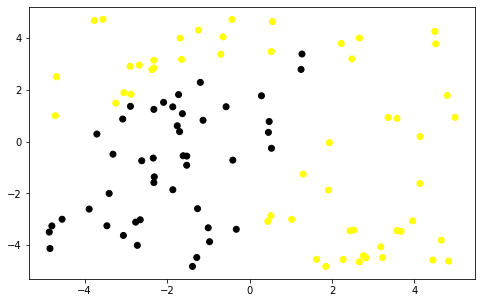

In [76]:
fig = plt.figure(figsize =(8, 5))
color_theme = np.array(['yellow','black'])
plt.scatter(data_x[:,0],data_x[:,1],c=color_theme[data_y])
plt.show()

In [72]:
class Backprop:
    
    def __init__(self,n_epoch,n_neur=3,b=1,c=0.5, u=0.1):
        self.u = u
        self.c =c
        self.b = b
        self.n_neur = n_neur
        self.n_epoch = n_epoch
        self.wei = None
        self.init_wei = self._init_wei
        self.ACT_fx = self._ACT_fx
        self.ACT_fx_2 = self._ACT_fx_2
        self.SIG_fx_in = self._SIG_fx_in
        self.SIG_fx_out = self._SIG_fx_out
        self.DELTA_Fx_outside = self._DELTA_Fx_outside
        self.DELTA_Fx_inside = self._DELTA_Fx_inside
        self.WEI_ch = self._WEI_ch
        self.WEI_ch_inside = self._WEI_ch_inside
        
    def _init_wei(self,x_arr):
        self.wei = default_rng().random((np.shape(data_x)[1]+1,self.n_neur))
        return self.wei

    def _ACT_fx(self,x_arr,row,neur):
        ACT_res = (self.wei[neur][-1]*self.b) + np.sum(self.wei[neur][0:np.shape(data_x)[1]]*x_arr[row])
        return ACT_res

    def _ACT_fx_2(self,TF_res_in,neur):
        ACT_res = (self.wei[neur][-1]*self.b) + np.sum(self.wei[neur][0:np.shape(data_x)[1]]*TF_res_in)
        return ACT_res

    def _SIG_fx_in(self,row,neur,x_arr):
        TF_a = 1/(1+np.power(np.e,-self.ACT_fx(x_arr,row,neur)))
        return TF_a

    def _SIG_fx_out(self,neur,TF_res_in,x_arr):
        TF_a = 1/(1+np.power(np.e,-self.ACT_fx_2(TF_res_in,neur)))
        return TF_a

    def _DELTA_Fx_outside(self,y_arr,TF_a,row):
        delta_out = (y_arr[row]-TF_a)*TF_a*(1-TF_a)
        return delta_out

    def _DELTA_Fx_inside(self,TF_a,delta_out,neur):
        delta_in = TF_a*(1-TF_a)*(self.wei[neur][0:np.shape(data_x)[1]]*delta_out)
        return delta_in

    def _WEI_ch(self,delta,TF_a,wei_diff):
        wei_diff = (self.c*delta*TF_a)+(self.u*wei_diff)
        return wei_diff

    def _WEI_ch_inside(self,delta,x_arr,row,wei_diff):
        l = np.insert(x_arr[row],2,1)
        wei_diff = (self.c*delta*l)+(self.u*wei_diff)
        return wei_diff

    def fit(self,x_arr,y_arr):
        TF_res_in, delta_in = np.empty(0), np.empty(0)
        wei_add_out,wei_add_in_1,wei_add_in_2 = np.zeros(np.shape(data_x)[1]+1),np.zeros(np.shape(data_x)[1]+1),np.zeros(np.shape(data_x)[1]+1)
        self.wei = self.init_wei(np.shape(data_x)[1])
        err_rate_res = [ ]
        err_rate = 0
        for epoch in range(self.n_epoch):
            x_arr,y_arr = shuffle(x_arr,y_arr)
            err_rate_res.append(err_rate)
            err_rate = 0
            res = [ ]
            for row, ele in enumerate(x_arr):
                for neur in range(self.n_neur-1):
                    TF_res_in = np.append(TF_res_in,self.SIG_fx_in(row,neur,x_arr))
                TF_res_out = self.SIG_fx_out(self.n_neur-1,TF_res_in,x_arr)
                TF_res_in = np.insert(TF_res_in,2,1)
                delta_out = self.DELTA_Fx_outside(y_arr,TF_res_out,row)
                wei_add_out = self.WEI_ch(delta_out,TF_res_in,wei_add_out)
                TF_res_in = np.delete(TF_res_in,-1)
                delta_in = np.append(delta_in,self.DELTA_Fx_inside(TF_res_in,delta_out,2)) 
                wei_add_in_1 = self.WEI_ch_inside(delta_in[1],x_arr,row,wei_add_in_1) 
                wei_add_in_2 = self.WEI_ch_inside(delta_in[0],x_arr,row,wei_add_in_2) 
                com_wei_add = np.vstack([wei_add_in_2,wei_add_in_1,wei_add_out])
                self.wei = self.wei+com_wei_add
                TF_res_in = np.empty(0)
                delta_in = np.empty(0)
                res.append(TF_res_out)
                err_rate += np.power(TF_res_out-y_arr[row],2)
        return err_rate_res

In [73]:
model = Backprop(800)

In [74]:
err = model.fit(data_x,data_y)

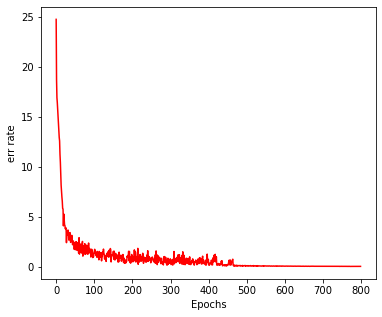

In [75]:
fig = plt.figure(figsize =(6, 5))
plt.plot(err[1:],color = 'red')
plt.ylabel('err rate')
plt.xlabel('Epochs')
plt.show()

In [78]:
x_arr = np.array([[0,0],[0,1],[1,0],[1,1]])
y_arr = np.array([0,1,1,0])

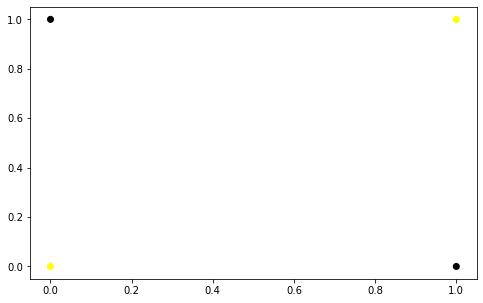

In [79]:
fig = plt.figure(figsize =(8, 5))
color_theme = np.array(['yellow','black'])
plt.scatter(x_arr[:,0],x_arr[:,1],c=color_theme[y_arr])
plt.show()

In [80]:
model1 = Backprop(5_000)
err1 = model1.fit(x_arr,y_arr)

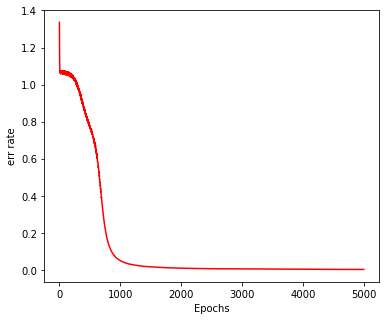

In [81]:
fig = plt.figure(figsize =(6, 5))
plt.plot(err1[1:],color = 'red')
plt.ylabel('err rate')
plt.xlabel('Epochs')
plt.show()